# Stiff Van-der-Pol

The van der Pol problem is a common stiff differential equation.

In [1]:
"""Benchmark all solvers on the Van-der-Pol problem."""

import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax.config import config

from probdiffeq.util.doc_util import notebook

config.update("jax_platform_name", "cpu")

In [2]:
def load_results():
    """Load the results from a file."""
    return jnp.load("./results.npy", allow_pickle=True)[()]


def load_solution():
    """Load the solution-to-be-plotted from a file."""
    ts = jnp.load("./plot_ts.npy")
    ys = jnp.load("./plot_ys.npy")
    return ts, ys


def choose_style(label):
    """Choose a plotting style for a given algorithm."""
    if "probdiffeq" in label.lower():
        return {"color": "C0", "linestyle": "solid"}
    if "numba" in label.lower():
        return {"color": "C4", "linestyle": "dashed"}
    if "scipy" in label.lower():
        return {"color": "C2", "linestyle": "dashed"}
    if "diffrax" in label.lower():
        return {"color": "C3", "linestyle": "dotted"}
    msg = f"Label {label} unknown."
    raise ValueError(msg)


def plot_results(axis, results):
    """Plot the results."""
    axis.set_title("Benchmark")
    for label, wp in results.items():
        style = choose_style(label)

        precision = wp["precision"]
        work_mean, work_std = (wp["work_mean"], wp["work_std"])
        axis.loglog(precision, work_mean, label=label, **style)

        range_lower, range_upper = work_mean - work_std, work_mean + work_std
        axis.fill_between(precision, range_lower, range_upper, alpha=0.3, **style)

    axis.set_xlabel("Precision [absolute RMSE]")
    axis.set_ylabel("Work [wall time, s]")
    axis.legend(
        loc="upper center",
        ncols=3,
        fontsize="x-small",
        mode="expand",
        facecolor="ghostwhite",
    )
    axis.grid()
    axis.set_ylim((1e-3, 3e1))
    return axis


def plot_solution(axis, ts, ys, yscale="linear"):
    """Plot the IVP solution."""
    axis.set_title("Van-der-Pol (stiffness: $10^5$)")
    kwargs = {"alpha": 0.85}

    axis.plot(
        ts,
        ys[:, 0],
        label="y",
        linestyle="solid",
        color="black",
        marker="None",
        **kwargs,
    )
    axis.plot(
        ts,
        ys[:, 1],
        label=r"$\dot y$",
        linestyle="dashed",
        color="black",
        marker="None",
        **kwargs,
    )

    axis.legend(facecolor="ghostwhite")
    axis.set_xlabel("Time $t$")
    axis.set_ylabel("Solution $y$ [clipped]")
    axis.set_yscale(yscale)
    axis.set_ylim((-6, 6))
    return axis

In [3]:
plt.rcParams.update(notebook.plot_style())
plt.rcParams.update(notebook.plot_sizes())

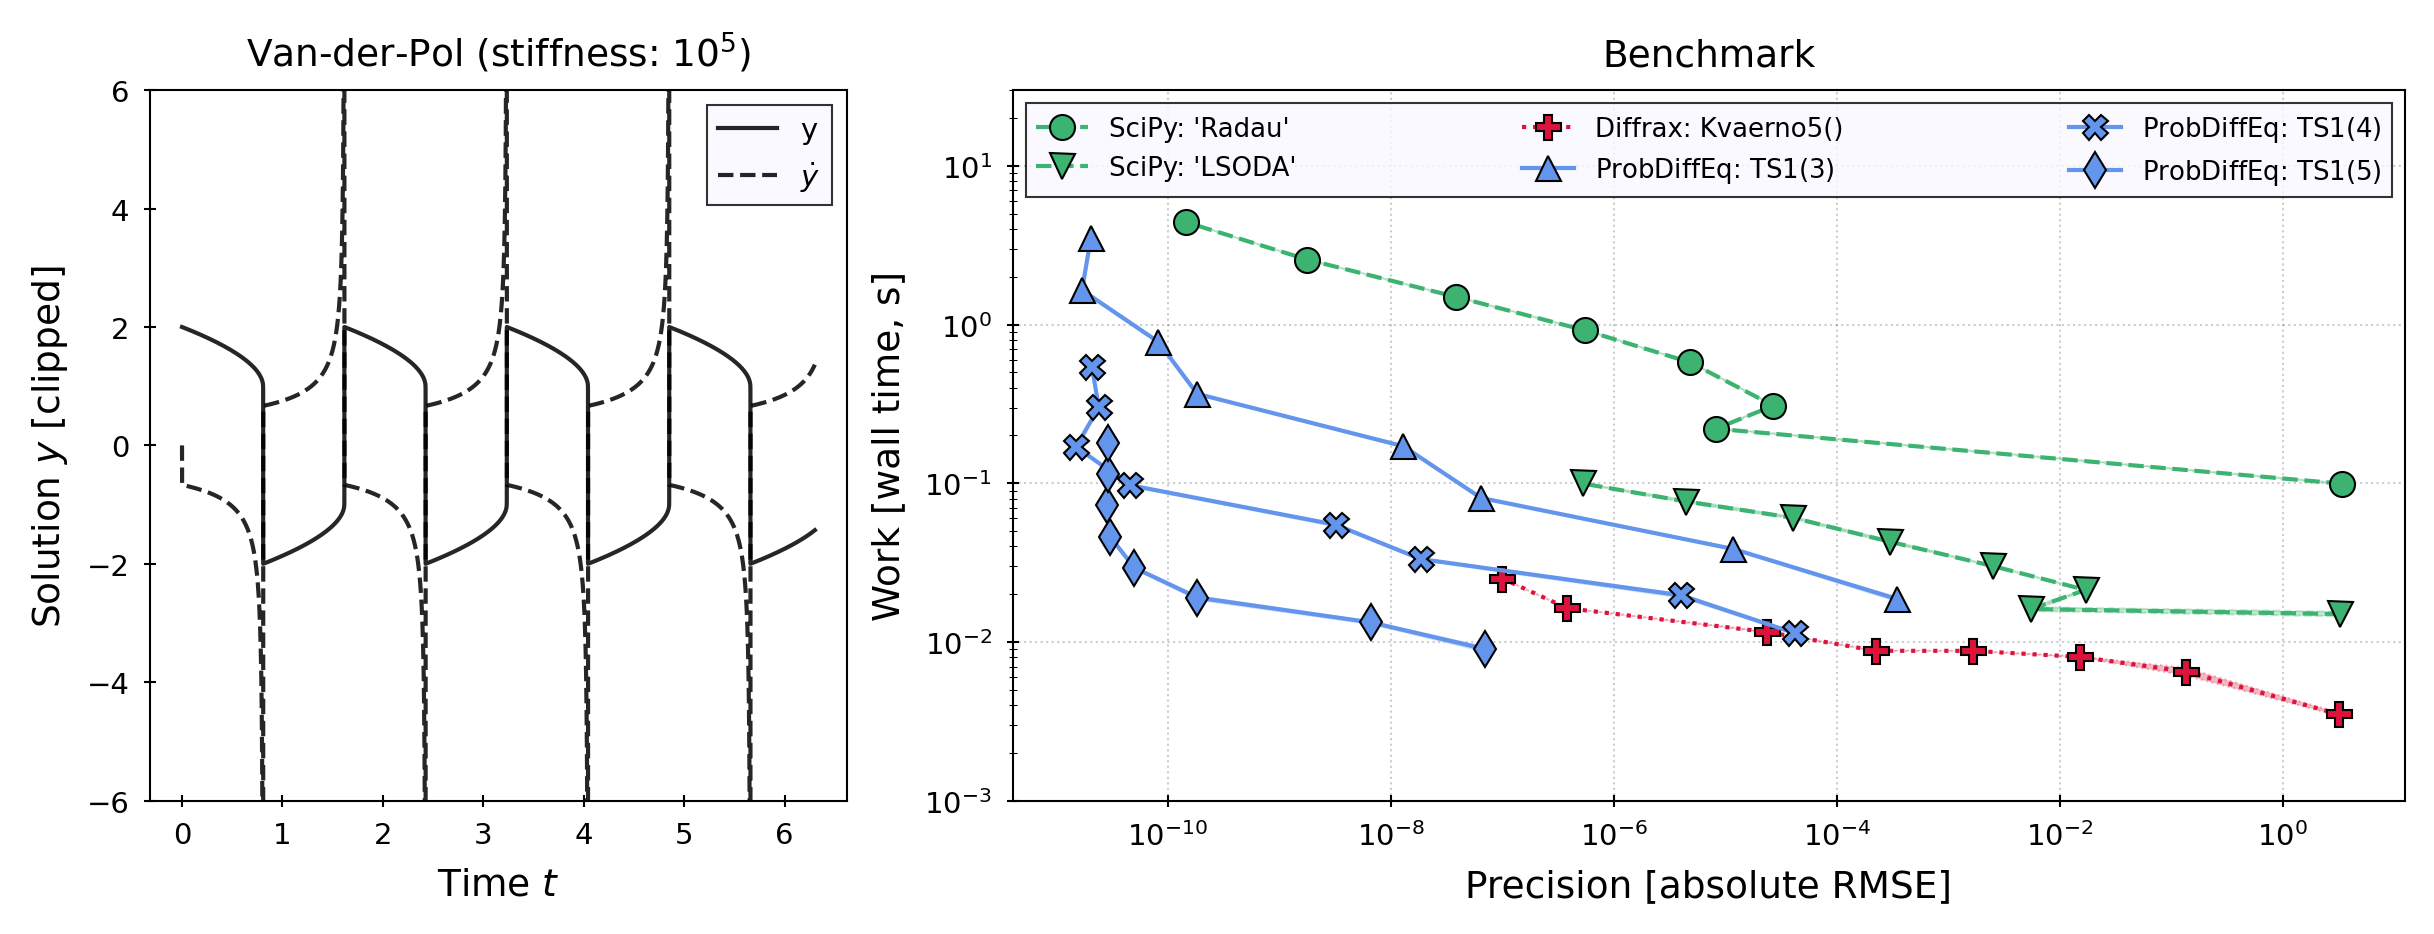

In [4]:
layout = [
    ["solution", "benchmark", "benchmark"],
    ["solution", "benchmark", "benchmark"],
]
fig, axes = plt.subplot_mosaic(layout, figsize=(8, 3), constrained_layout=True, dpi=300)


results = load_results()
ts, ys = load_solution()

_ = plot_results(axes["benchmark"], results)
_ = plot_solution(axes["solution"], ts, ys)

plt.show()